In [1]:
import os
import numpy as np
import copy
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

In [2]:
pwd = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Coordinates1/DES0000+0418/'
filename_g = '138780459_g.fits'
filename_i = '138780459_g.fits'
filename_r = '138780459_g.fits'

In [3]:
with fits.open(pwd + filename_g) as hdul:
    data_g = hdul[0].data
with fits.open(pwd + filename_i) as hdul:
    data_i = hdul[0].data
with fits.open(pwd + filename_r) as hdul:
    data_r = hdul[0].data
data_g.shape

(114, 114)

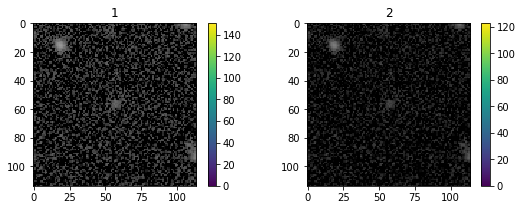

In [4]:
fig, (ax1, ax2) = plt.subplots(figsize=(9, 3), ncols=2)

rgb = make_lupton_rgb(data_i, data_r, data_g, Q=11., stretch=11.)

ax1.set_title('1')
original = ax1.imshow(rgb, aspect='equal')#, vmin = 5, vmax= 240)
fig.colorbar(original, ax=ax1)

rgb = make_lupton_rgb(data_g, data_r, data_i, Q=10., stretch=40.)

ax2.set_title('2')
projection = ax2.imshow(rgb, aspect='equal')
fig.colorbar(projection, ax=ax2)
plt.show()

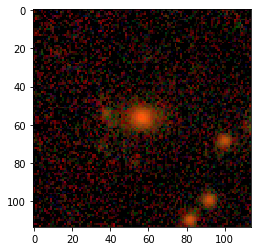

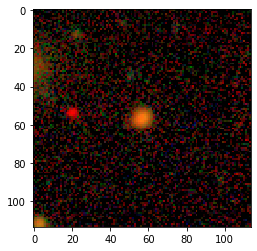

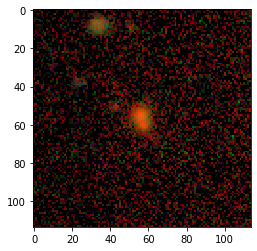

In [5]:
#Images of cutouts
directory_parent = 'Data/Coordinates1/'
folders = next(os.walk(directory_parent))[1]
n = 0
for folder in folders:
    files = sorted(next(os.walk(directory_parent + folder))[2])
    for file in files:
        if(file[-6:] == 'g.fits'):
            filename = file[:-7]
            if (n == 3):
                break
            g, i, r = '_g.fits', '_i.fits', '_r.fits'
            with fits.open(directory_parent + folder + '/' +filename+ g) as hdul:
                data_g = hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ i) as hdul:
                data_i = hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ r) as hdul:
                data_r = hdul[0].data
            rgb = make_lupton_rgb(data_i, data_r, data_g, Q=10., stretch=40.)
            n += 1
            plt.figure()    
            plt.imshow(rgb)
            plt.show()         

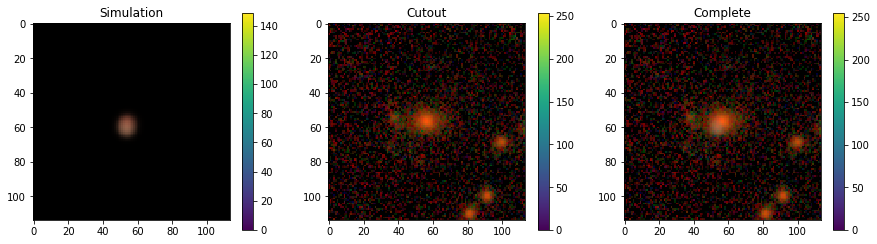

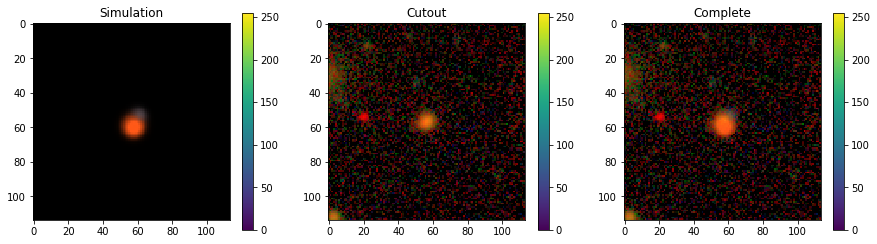

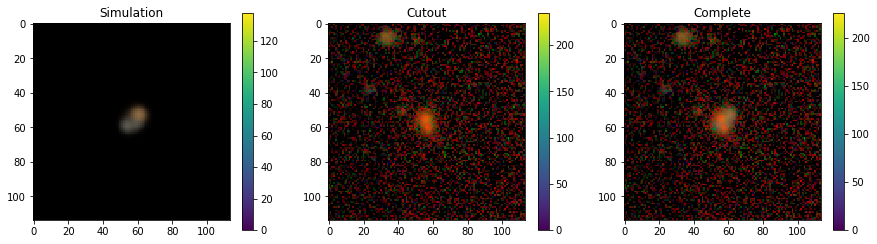

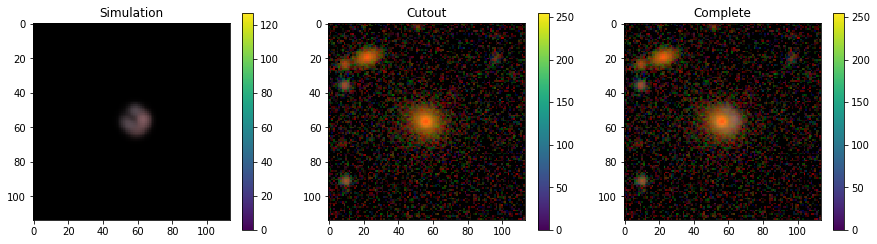

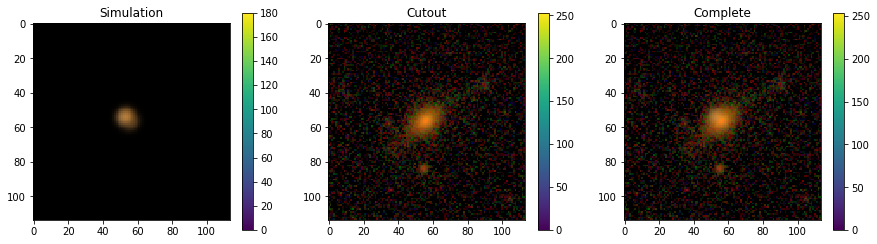

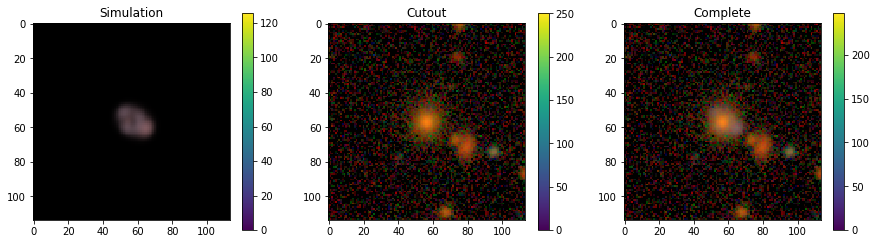

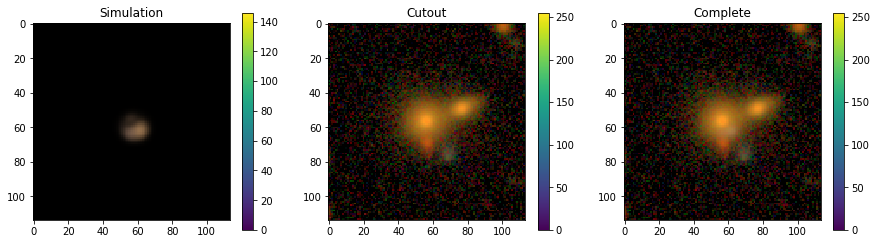

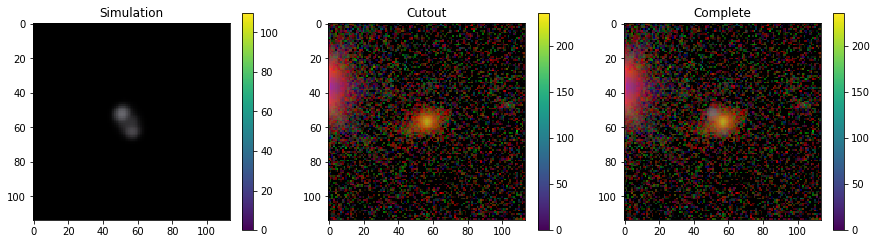

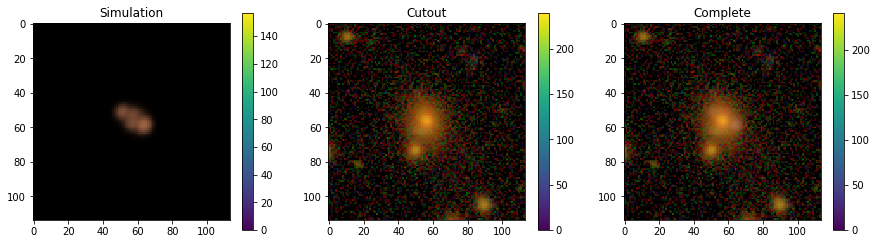

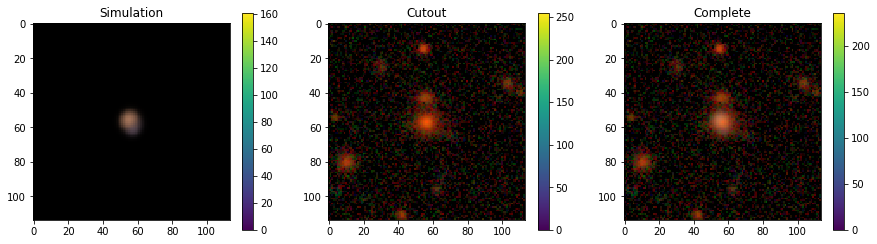

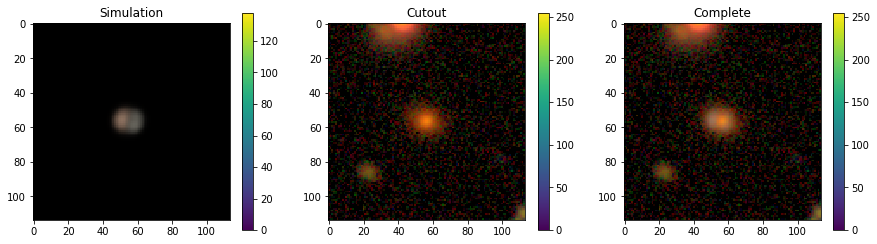

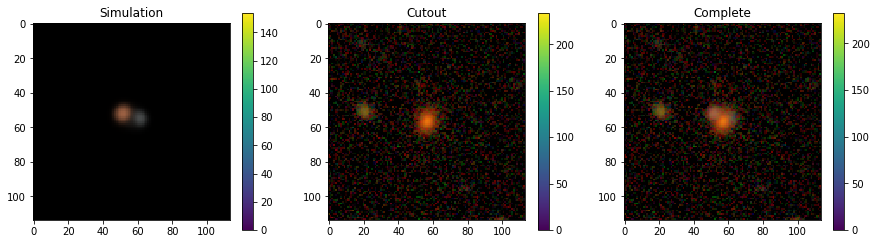

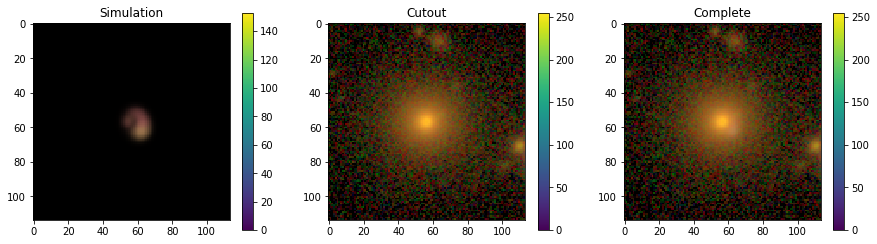

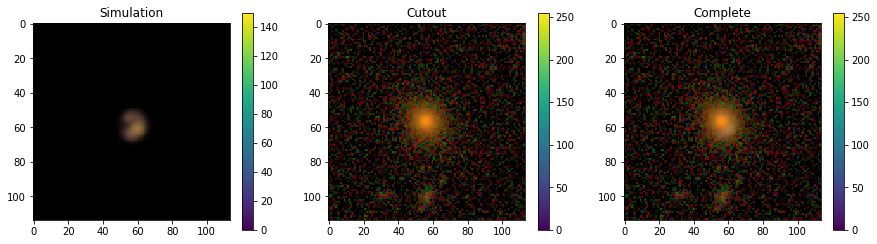

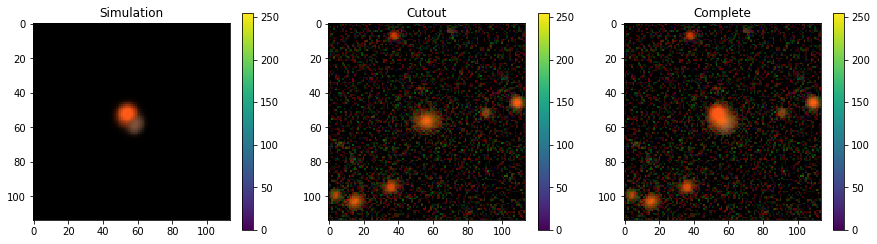

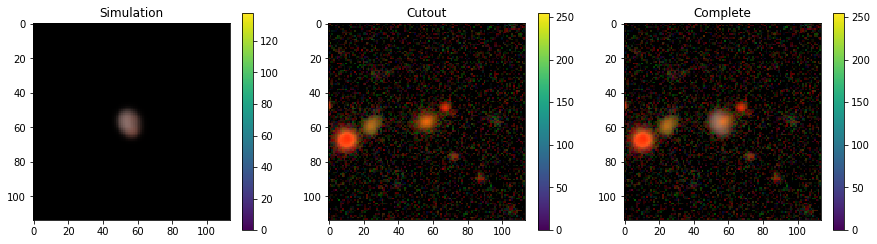

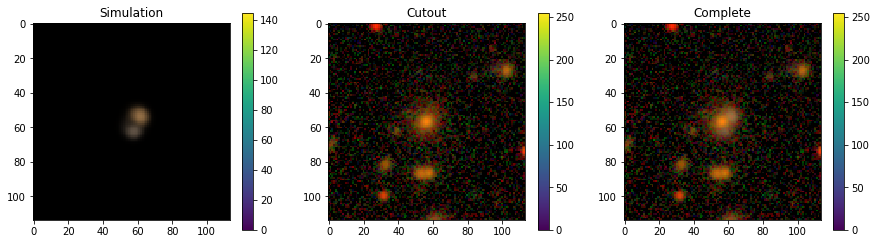

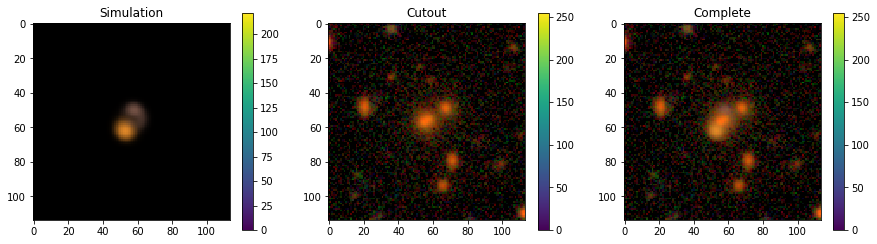

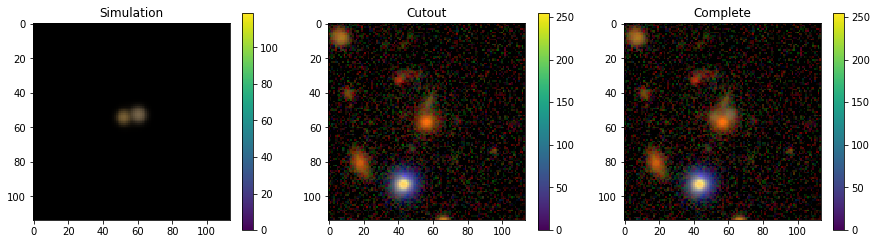

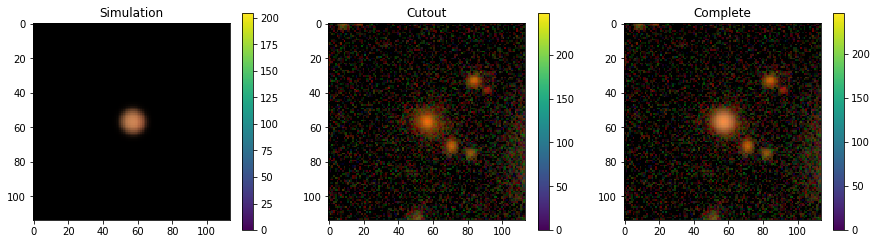

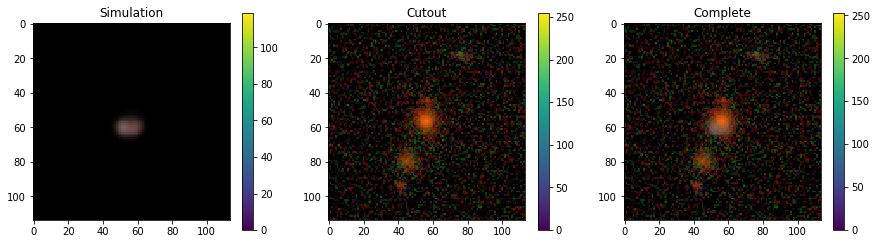

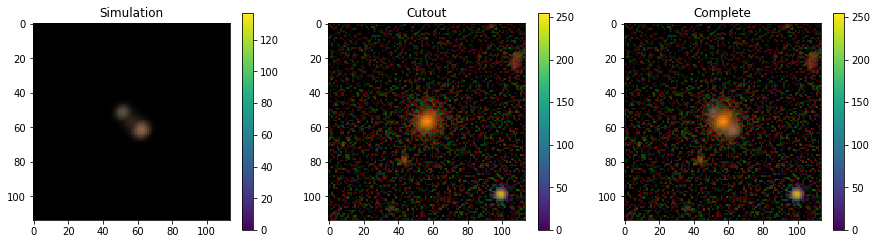

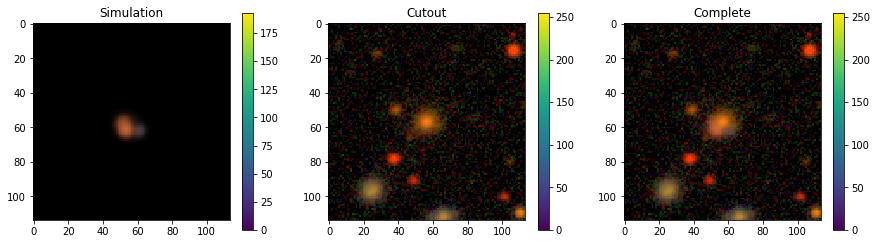

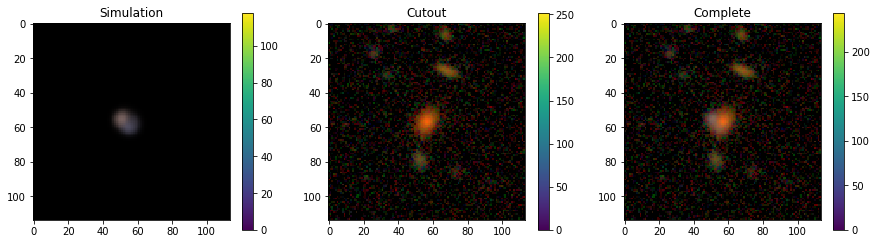

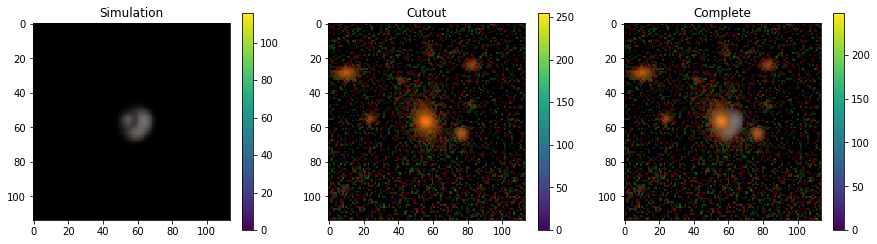

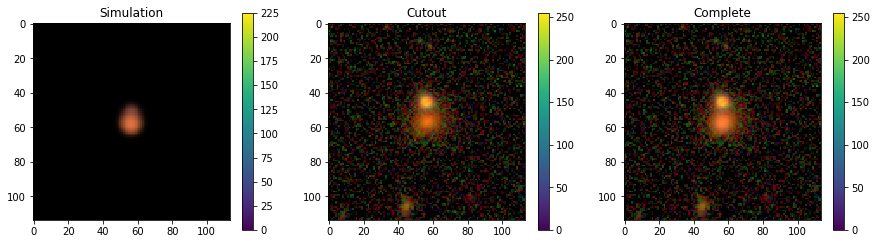

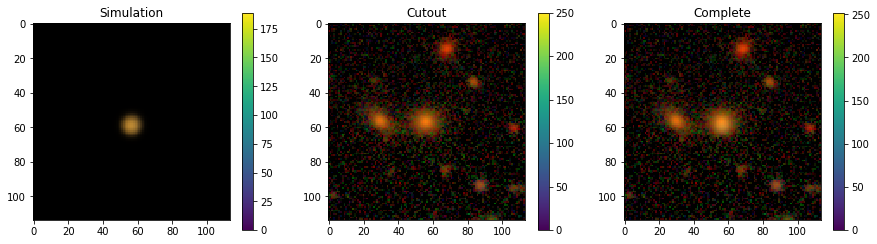

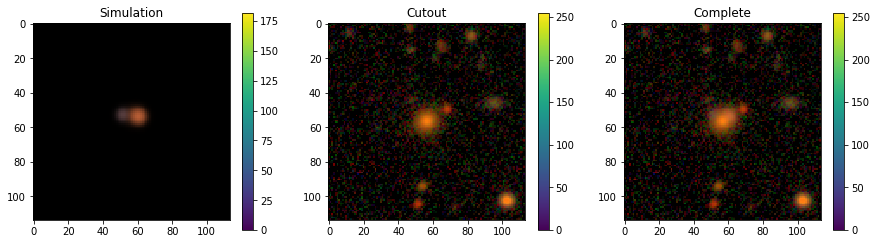

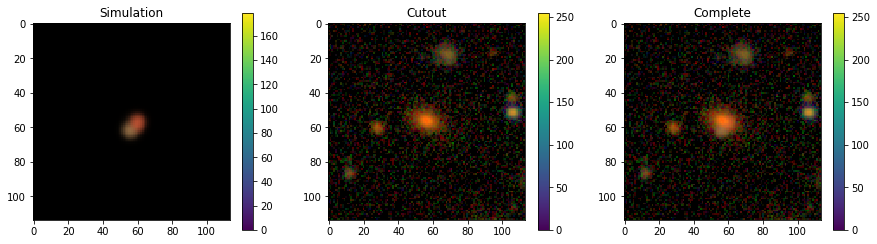

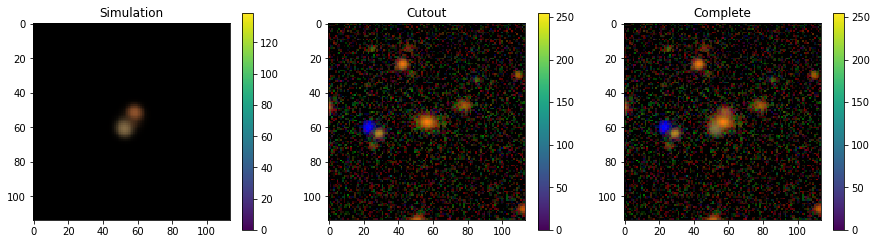

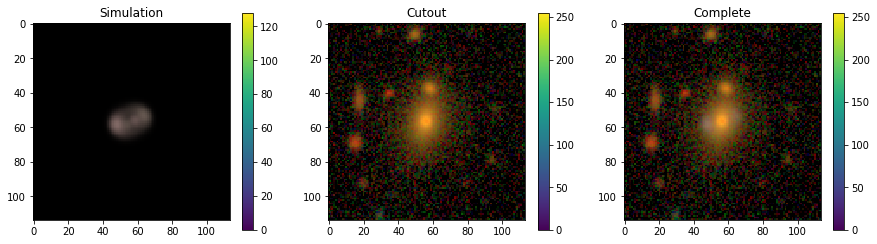

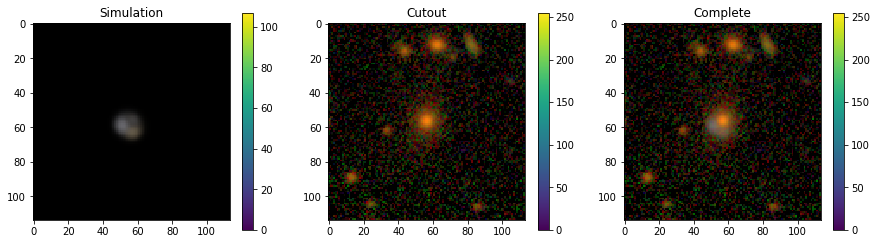

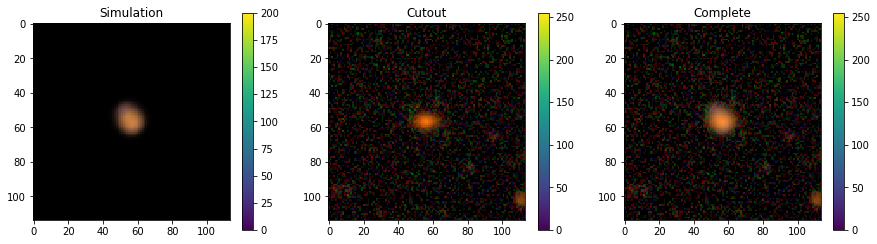

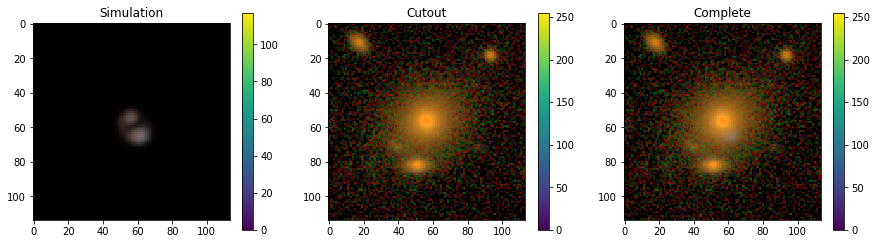

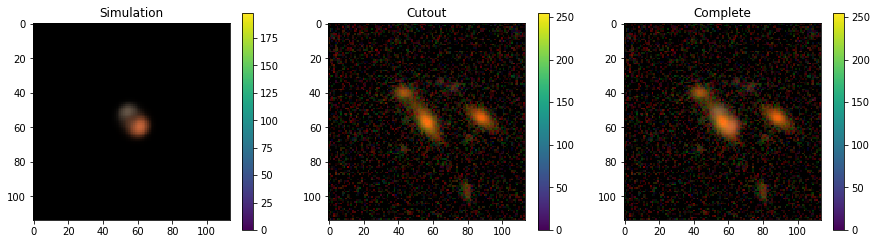

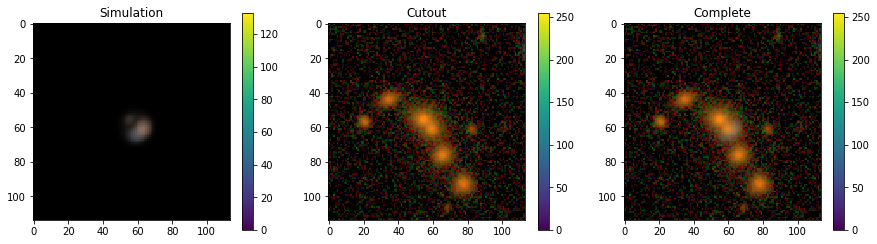

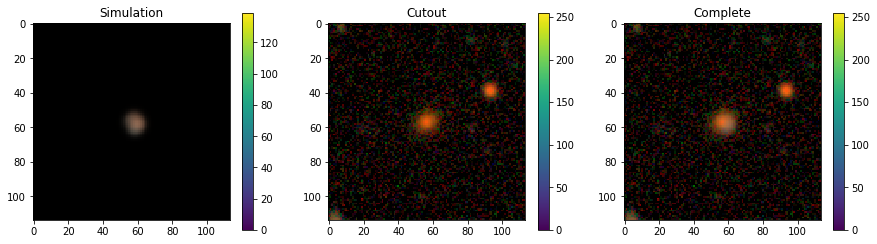

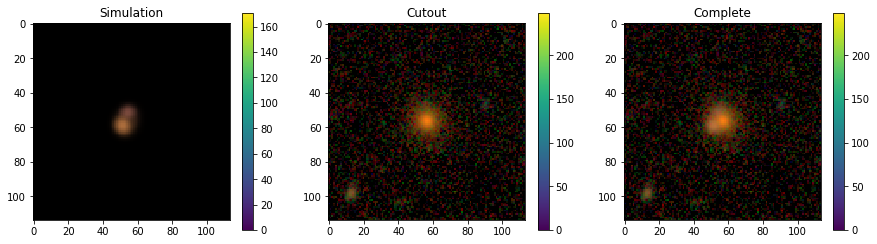

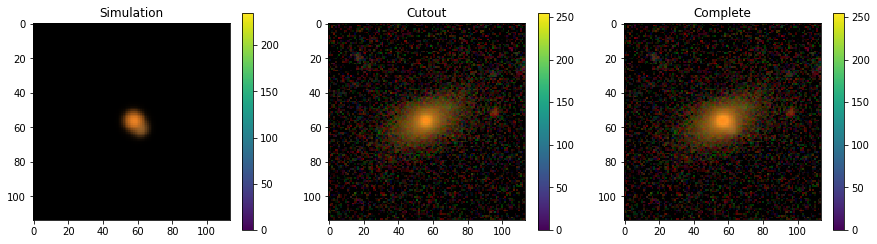

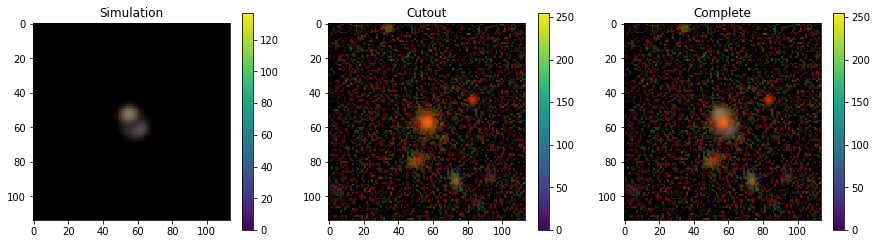

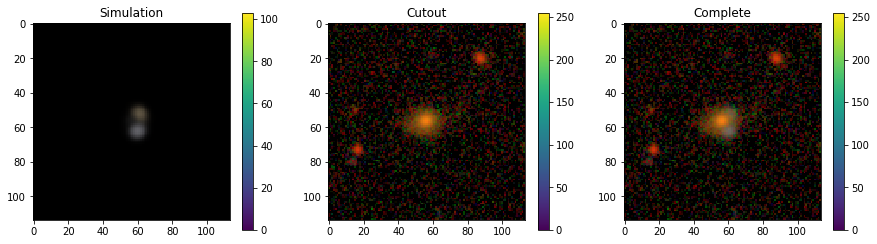

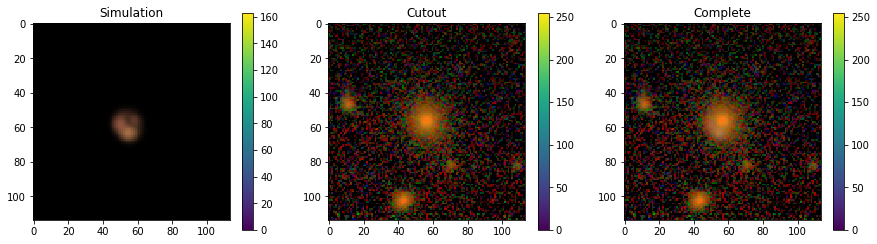

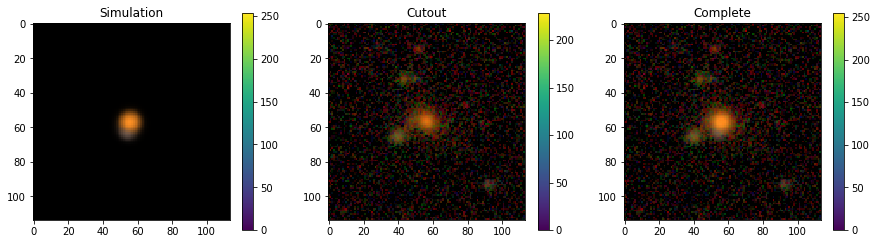

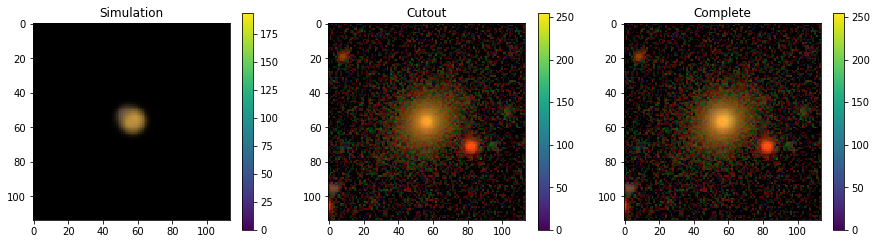

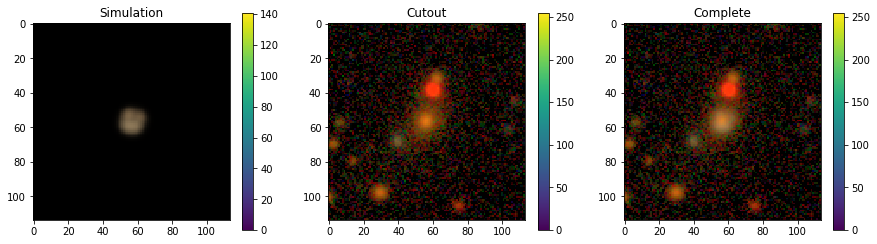

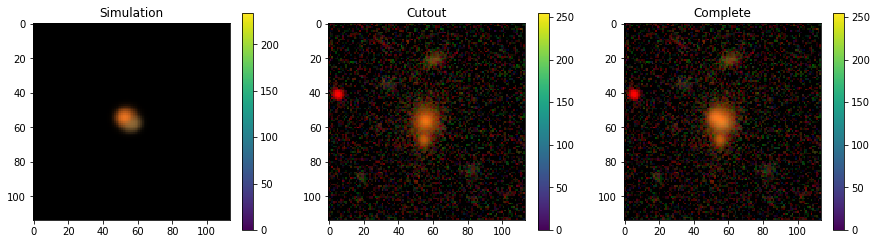

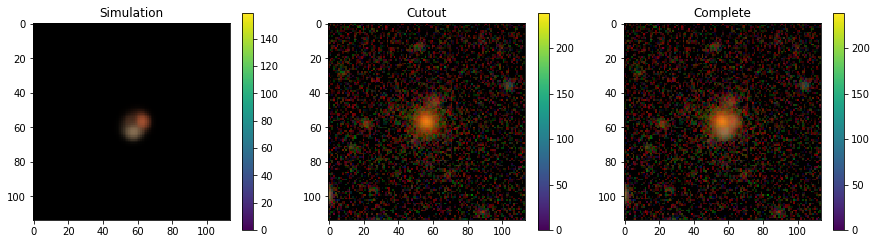

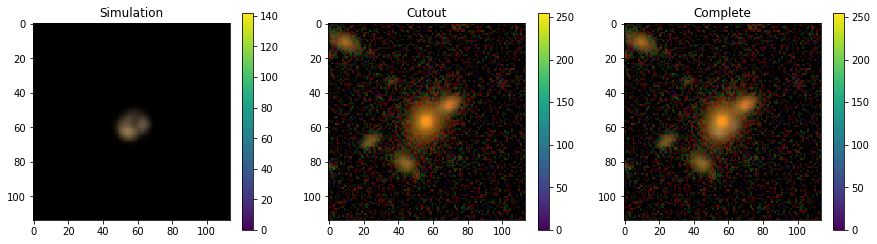

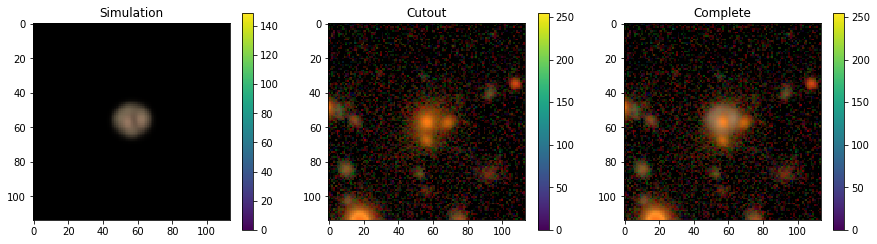

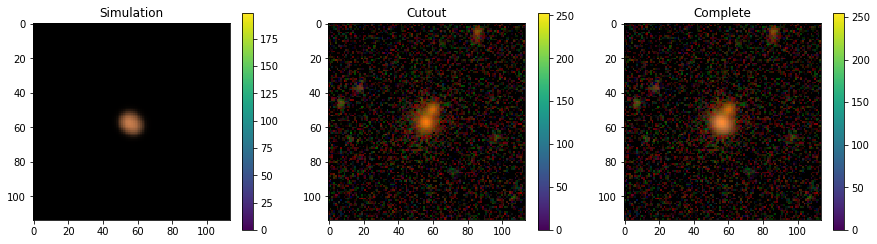

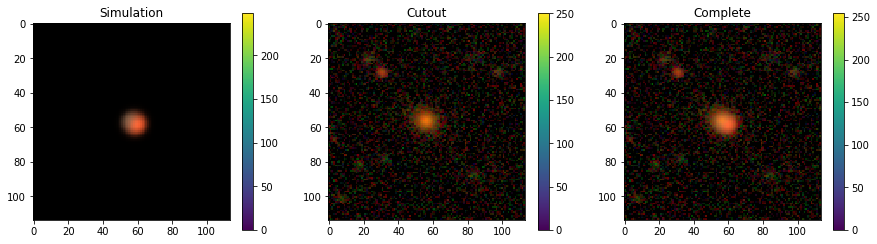

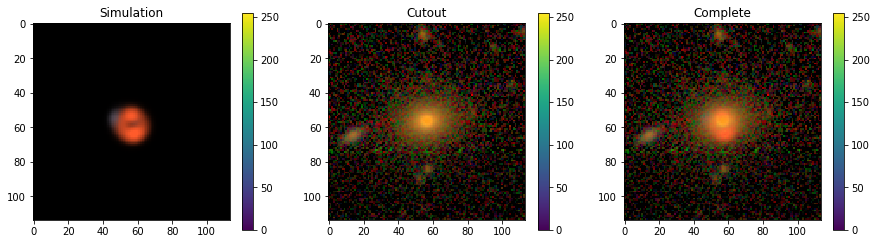

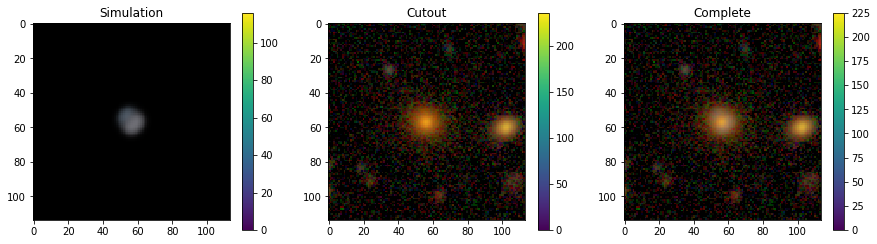

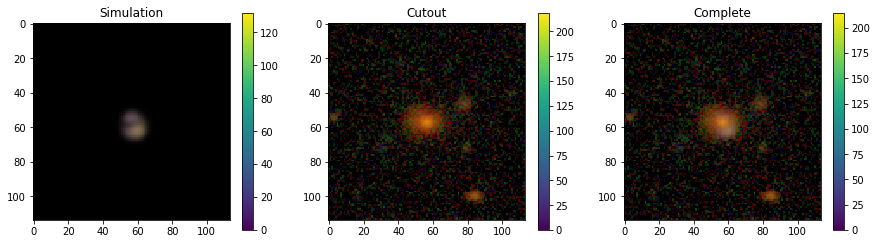

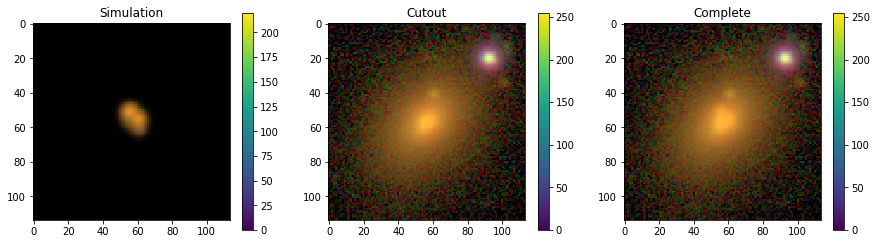

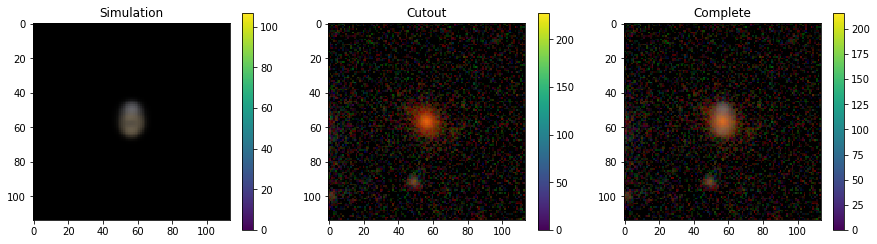

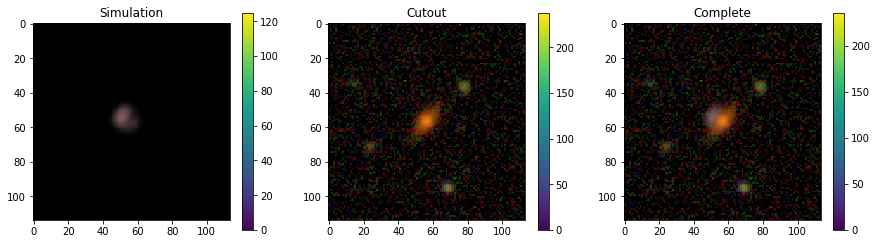

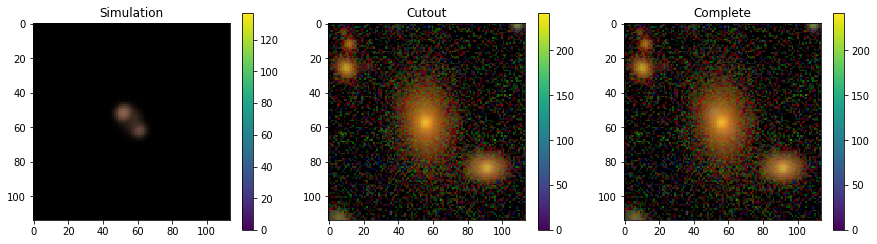

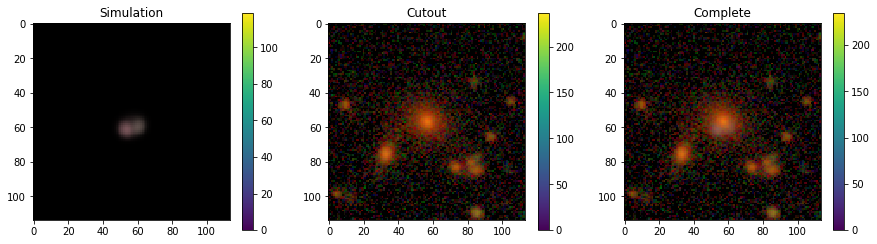

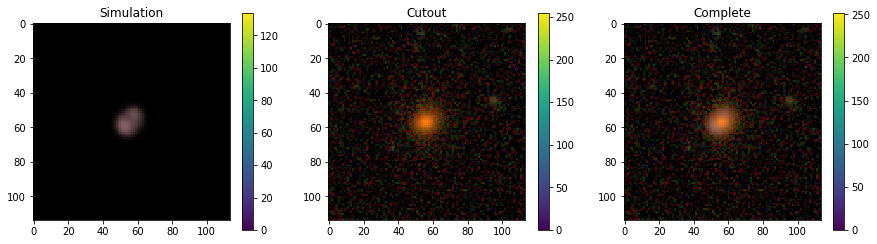

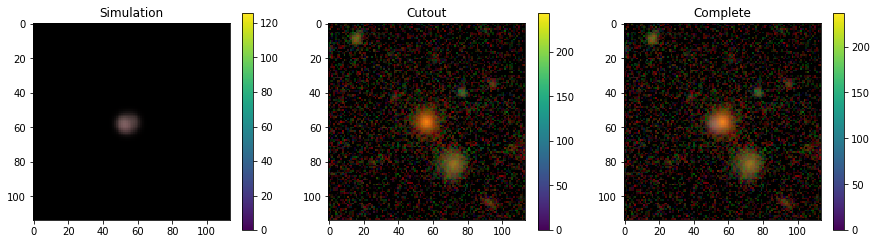

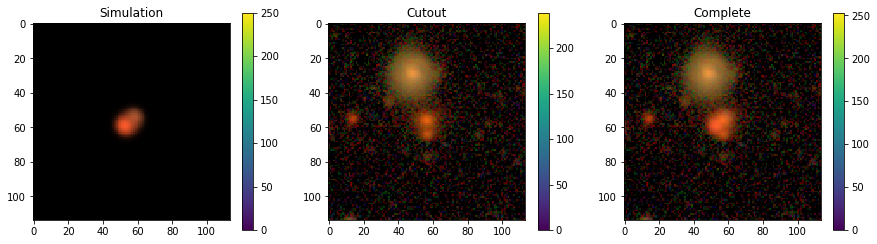

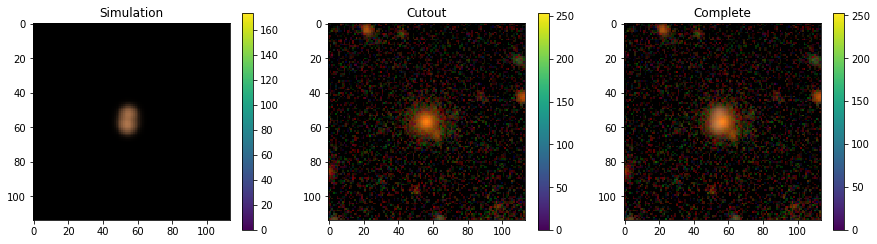

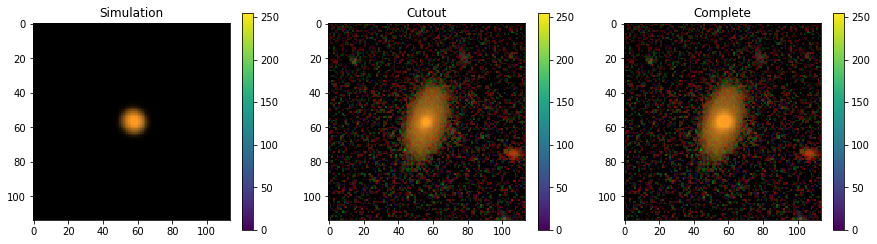

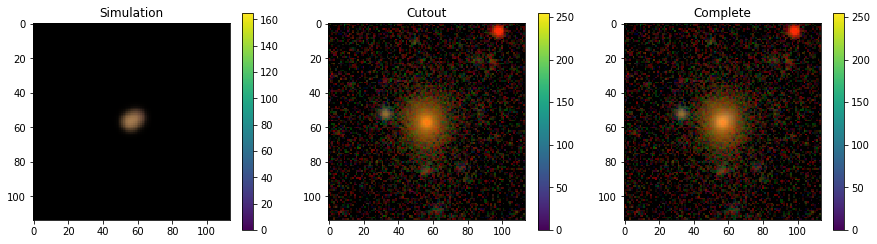

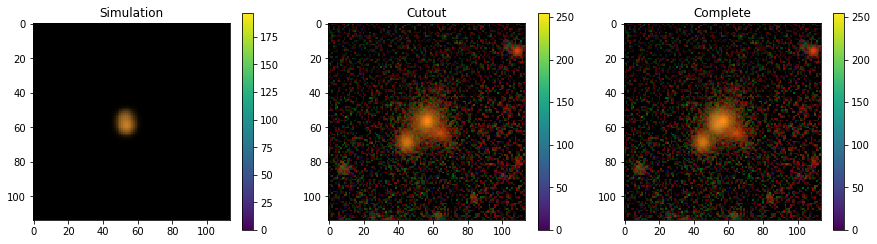

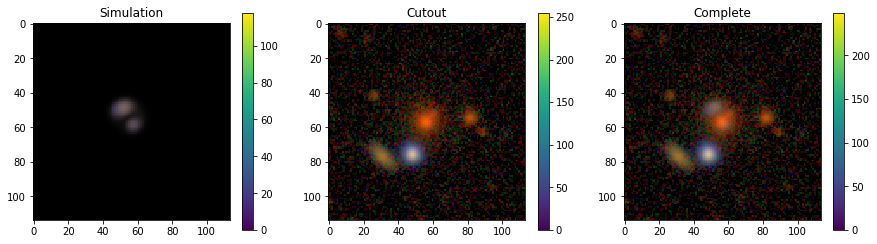

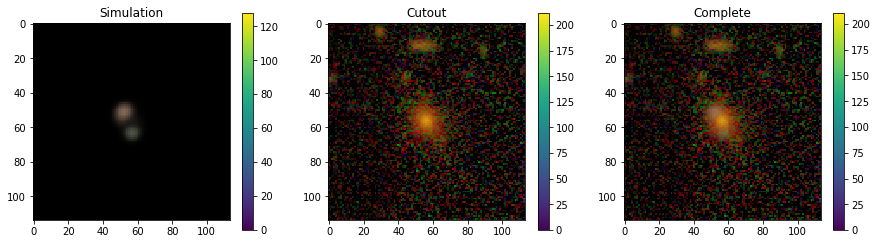

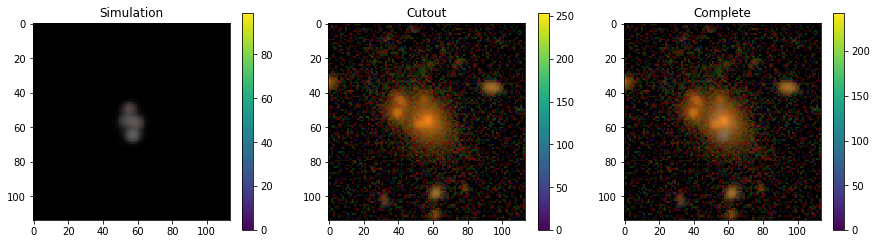

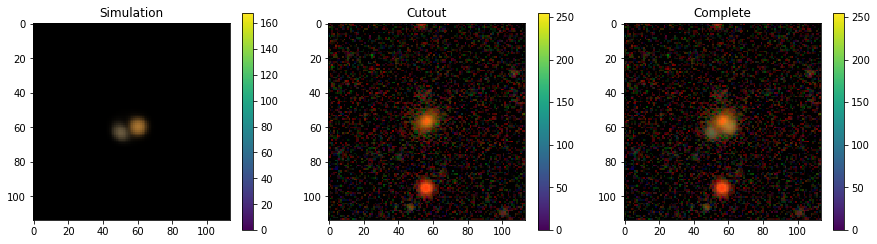

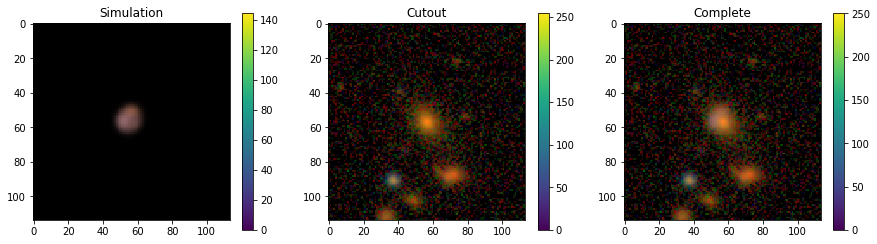

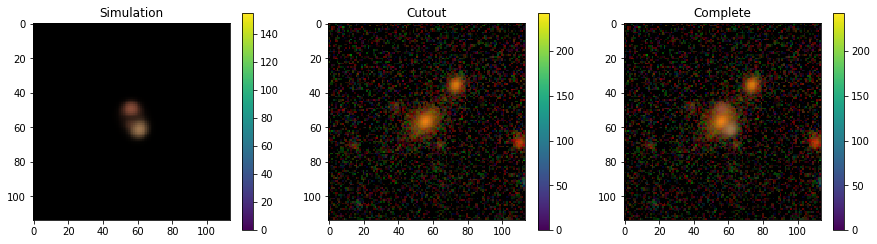

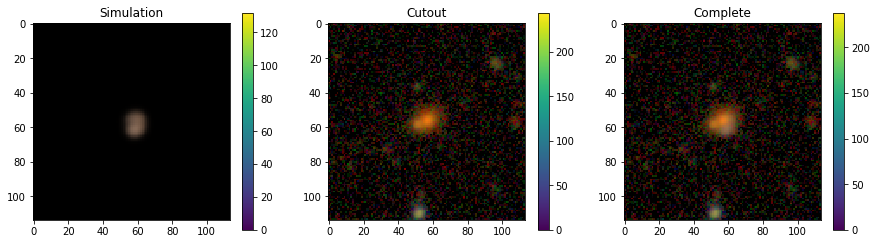

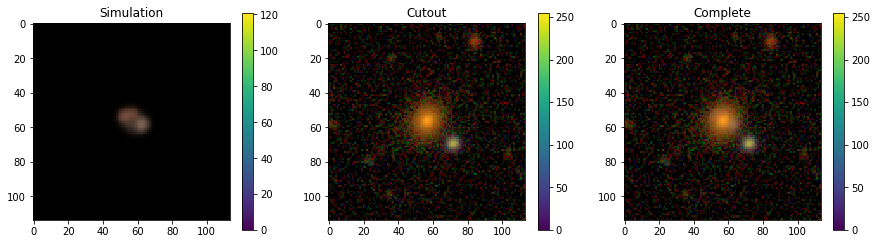

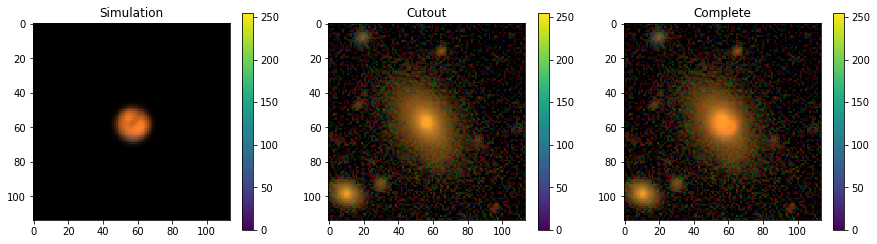

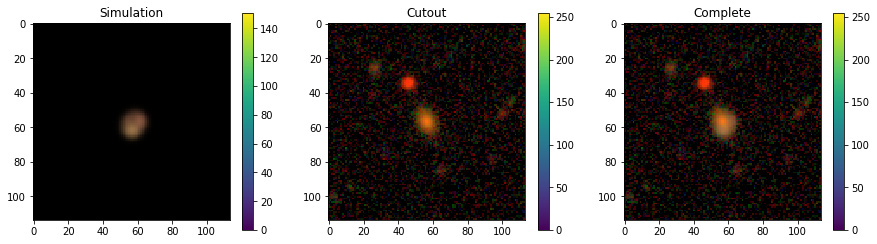

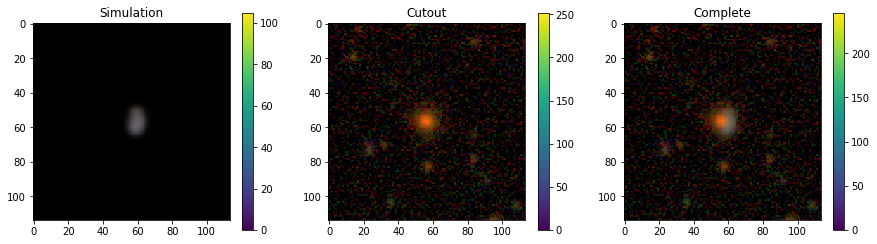

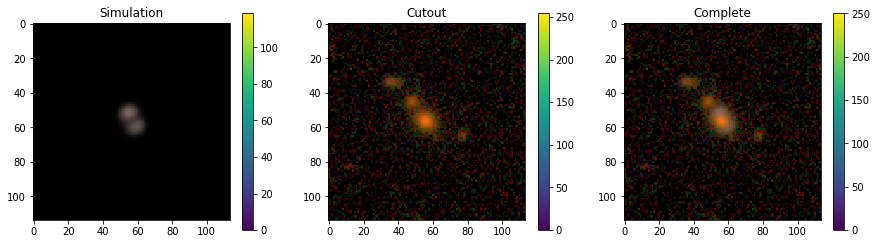

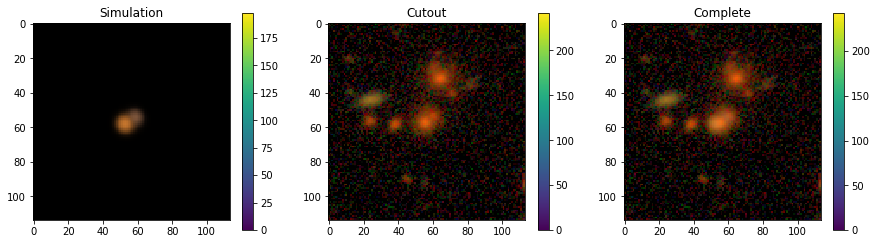

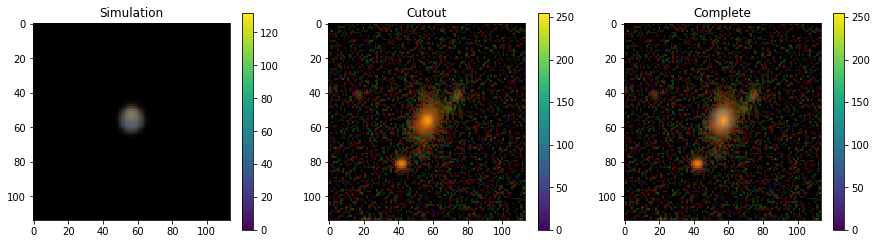

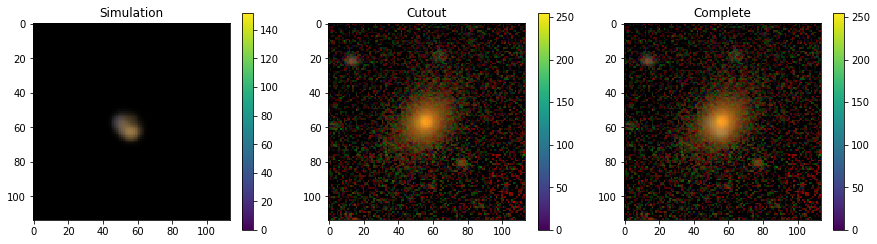

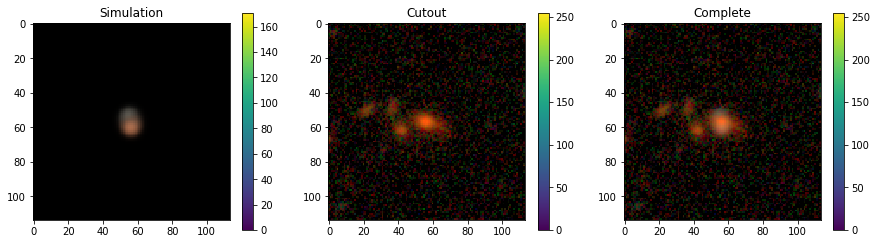

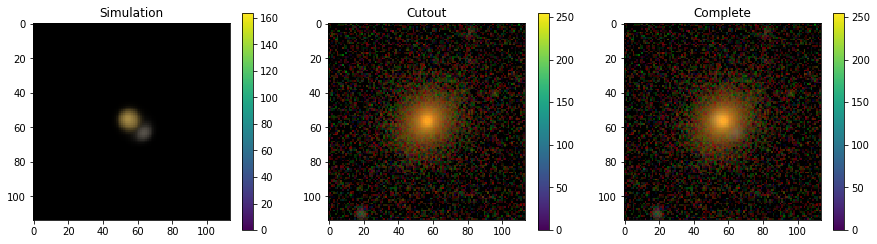

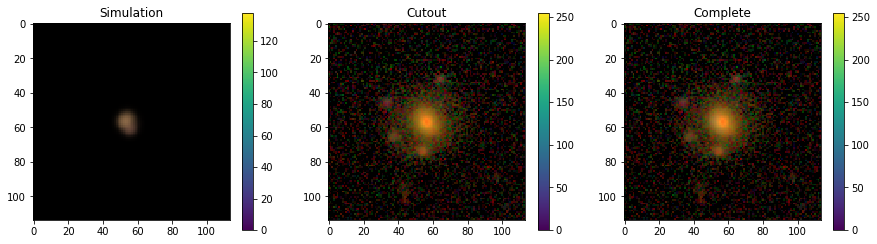

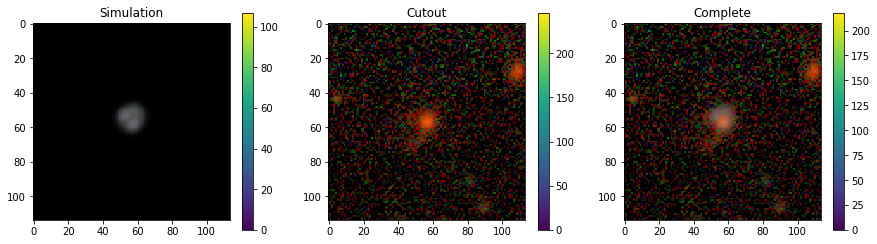

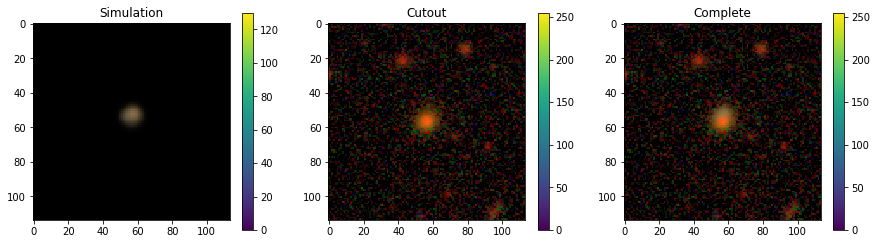

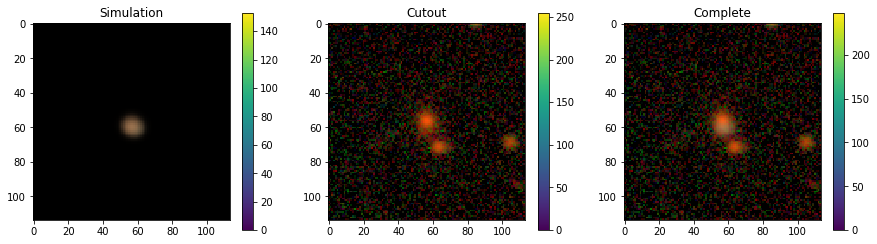

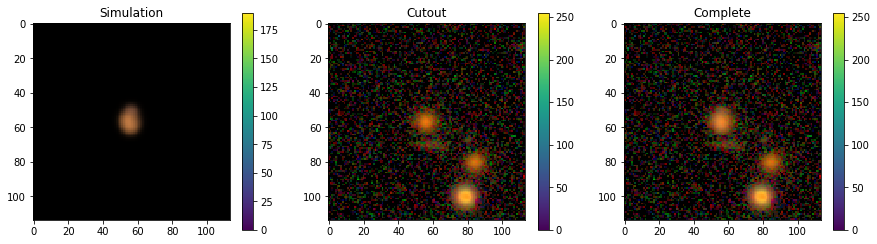

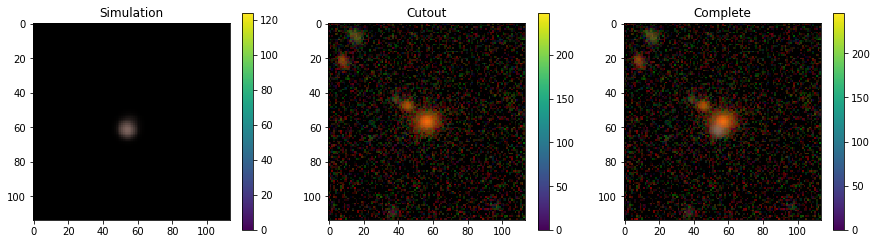

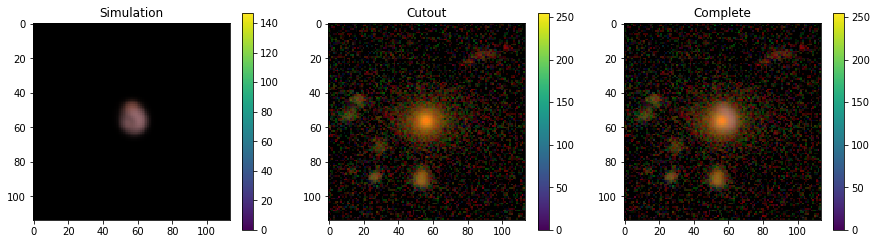

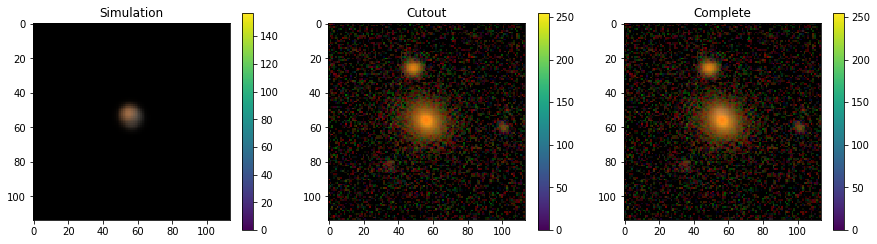

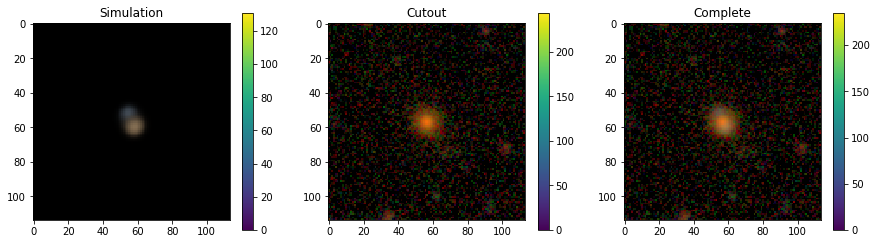

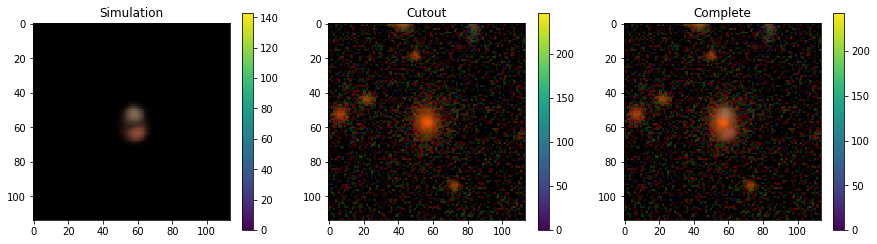

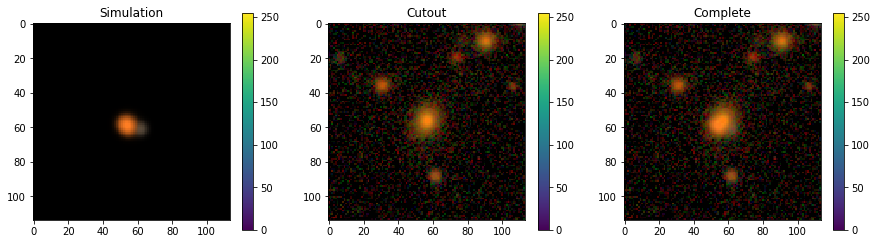

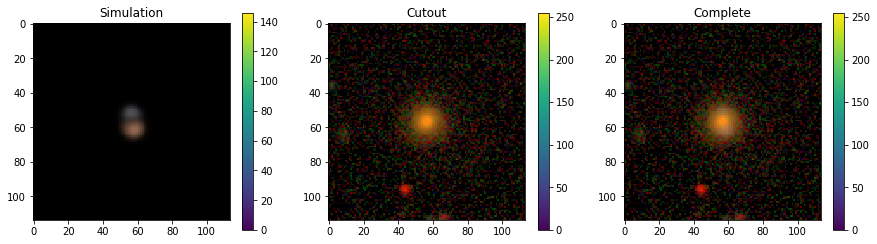

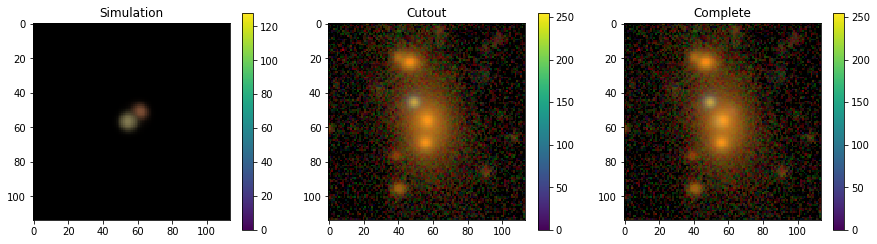

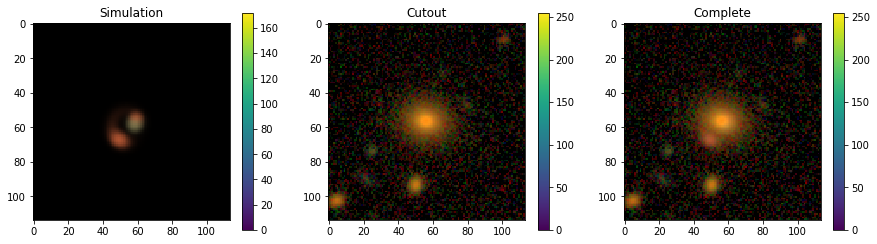

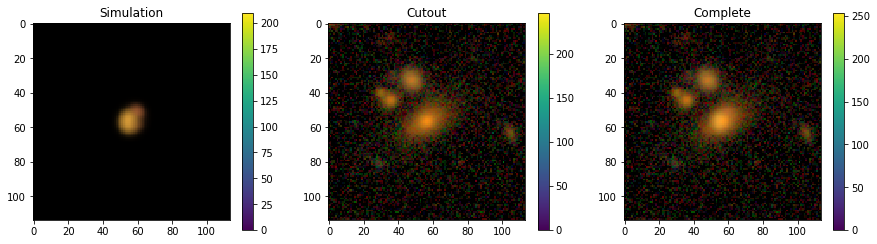

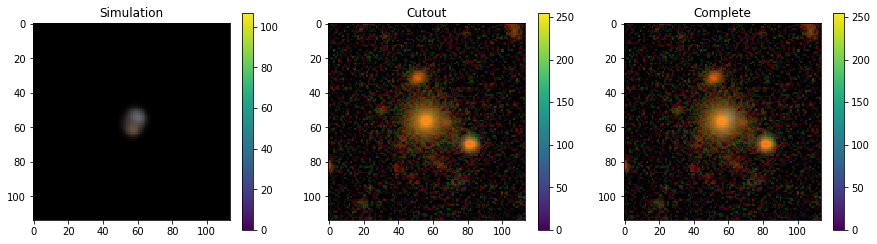

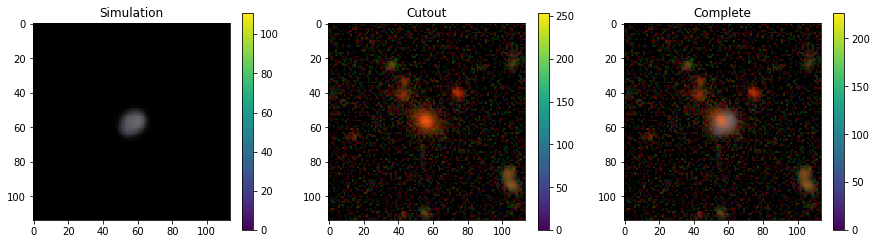

In [6]:
#Adding cutouts and simulations
directory_sim = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Sim/'
directory_parent = 'Data/Coordinates1/'
folders = next(os.walk(directory_parent))[1]
n = 0
for folder in folders:
    files = sorted(next(os.walk(directory_parent + folder))[2])
    for file in files:
        if(file[-6:] == 'g.fits'):
            filename = file[:-7]
            if (n == 100):
                break
            g, i, r = '_g.fits', '_i.fits', '_r.fits'
            with fits.open(directory_parent + folder + '/' +filename+ g) as hdul:
                cutout_g = copy.deepcopy(hdul[0].data)
            with fits.open(directory_sim + 'sim_' + filename + g) as hdul:
                sim_g   = copy.deepcopy(hdul[0].data)
            with fits.open(directory_parent + folder + '/' +filename+ i) as hdul:
                cutout_i = copy.deepcopy(hdul[0].data)
            with fits.open(directory_sim + 'sim_' + filename + i) as hdul:
                sim_i   = copy.deepcopy(hdul[0].data)
            with fits.open(directory_parent + folder + '/' +filename+ r) as hdul:
                cutout_r = copy.deepcopy(hdul[0].data)
            with fits.open(directory_sim + 'sim_' + filename + r) as hdul:
                sim_r   = copy.deepcopy(hdul[0].data)
                
            hdu = fits.PrimaryHDU(sim_g+cutout_g)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_g.fits')
            hdu = fits.PrimaryHDU(sim_i+cutout_i)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_i.fits')
            hdu = fits.PrimaryHDU(sim_r+cutout_r)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_r.fits')
            n += 1
            
            fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)

            rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
            ax1.set_title('Simulation')
            original = ax1.imshow(rgb, aspect='equal')
            fig.colorbar(original, ax=ax1)

            rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
            ax2.set_title('Cutout')
            cutout = ax2.imshow(rgb, aspect='equal')
            fig.colorbar(cutout, ax=ax2)
            
            rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
            ax3.set_title('Complete')
            projection = ax3.imshow(rgb, aspect='equal')
            fig.colorbar(projection, ax=ax3)
            plt.savefig('Data/Sim_complete/Image' + filename + '.png', bbox_inches='tight')
            plt.show()